In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\cleaned_data_lat_long.csv')

df = df[df['YearStart'] == df['YearEnd']]
df = df[df['StratificationCategory1'] == 'Overall']
df = df.dropna(subset=['DataValue'])

# Pivot the DataFrame
pivoted_df = df.pivot_table(
    index='LocationDesc',  # States
    columns='Question',    # Unique questions
    values='DataValue',    # The value (e.g., obesity rate, life expectancy, etc.)
    aggfunc='first'        # Aggregate function for multiple values
)

# Standardize the data (mean = 0, std = 1)
pivoted_df = pivoted_df.fillna(pivoted_df.mean())  # Impute missing values with column mean
standardized_df = (pivoted_df - pivoted_df.mean()) / pivoted_df.std()

# Using the first column as the target (as an example) and others as features
target = standardized_df['Diabetes among adults'] 
features = standardized_df.drop(columns=['Diabetes among adults'])

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(features, target)

# Extract and sort feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

C:\Users\MadiL\AppData\Local\Temp\ipykernel_1016\3208160366.py:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\cleaned_data_lat_long.csv')


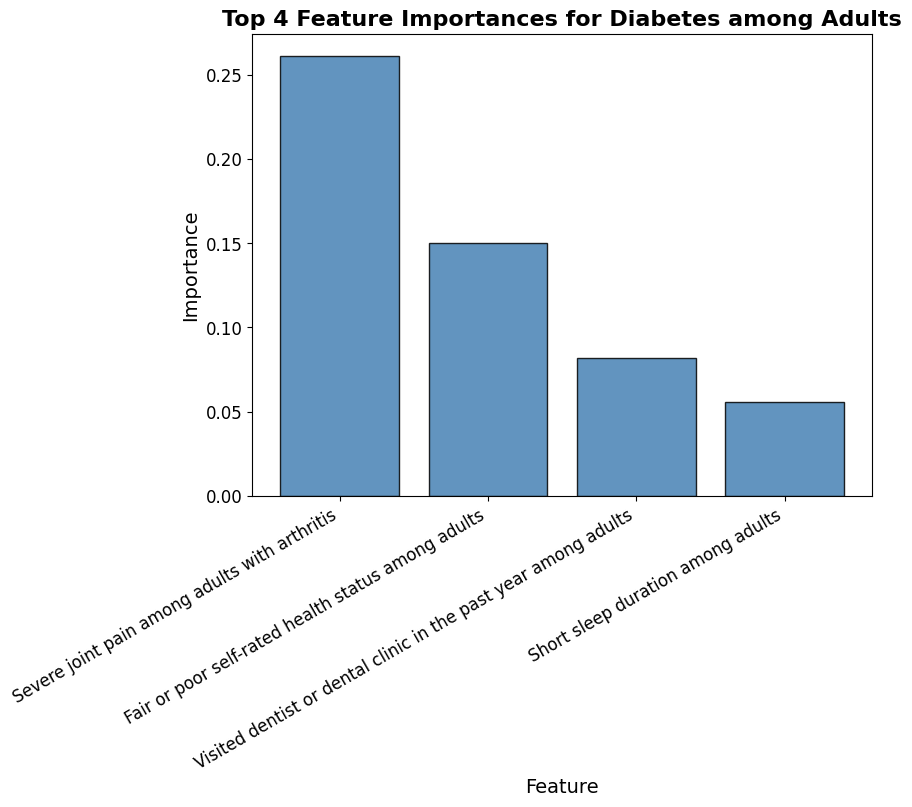

In [26]:
# Extract the top 4 features
top_features = sorted_importances.head(4)

# Plot the top 4 feature importances
plt.figure(figsize=(8, 6))
bars = plt.bar(top_features.index, top_features.values, color='steelblue', edgecolor='black', alpha=0.85)


# Customize chart labels and title
plt.title("Top 4 Feature Importances for Diabetes among Adults", fontsize=16, weight='bold')
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Importance", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)



# Adjust layout for better spacing
#
# plt.tight_layout()

# Show the improved chart
plt.show()
